In [1]:
!ls

ann-31-07-2018.csv  dataset_bernoulli.csv  dump.py    Untitled.ipynb
bayes.py	    dataset_gaussian.csv   runner.py
benchmarks.csv	    dataset_reduzido.csv   test.py


In [4]:
import pandas as pd
pd.read_csv('benchmarks.csv').groupby('1').count()

,0,2,3,4,5
1,,,,,
ann-01-07-2019,2646,2646,2646,2646,2646
ann80-01-07-2019,2238,2238,2238,2238,2238
arvore-01-07-2019,437833,437833,437833,437833,437833
naive-bayes-02-07-2019,2782,2782,2782,2782,2782
novo_modelo-01-07-2019,2529,2529,2529,2529,2529


In [21]:
results = pd.read_csv('benchmarks.csv')
results = results[results['1'].str.contains('naive-bayes')]
results = results.iloc[:, 2:]
results = results.rename(columns={
    '2': '0',
    '3': '1',
    '4': '2',
    '5': '3'
})
results.head()

,0,1,2,3
445246,40.0,5.0,0.0,3.0
445247,44.0,1.0,3.0,0.0
445248,39.0,2.0,3.0,4.0
445249,42.0,4.0,1.0,1.0
445250,39.0,4.0,0.0,5.0


In [22]:
import numpy as np
results['acc'] = ( results['0'] + results['3'] ) / \
( results['0'] + results['1'] + results['2'] + results['3'])
results['pos'] = results['3'] / ( results['3'] + results['1'] )
results['neg'] = results['0'] / ( results['0'] + results['2'] )
results[['acc', 'pos', 'neg']].agg([np.mean, np.std]).round(2)

,acc,pos,neg
mean,0.89,0.59,0.93
std,0.05,0.23,0.05


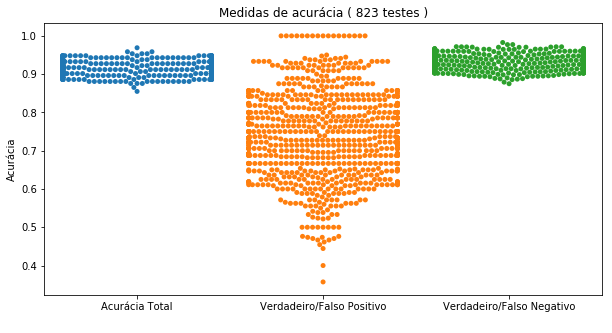

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

dataplot = results[['acc', 'pos', 'neg']]\
.rename(columns={
    'acc' : 'Acurácia Total',
    'pos' : 'Verdadeiro/Falso Positivo',
    'neg' : 'Verdadeiro/Falso Negativo'
})

g = sns.swarmplot(x='variable', y='value', data=dataplot.melt())
g.set(ylabel='Acurácia')
g.set(xlabel=' ')
g.set_title('Medidas de acurácia ( 823 testes )')
pass

In [23]:
results[['acc', 'pos', 'neg']].count()

acc    823
pos    823
neg    823
dtype: int64

In [32]:
results[['acc', 'pos', 'neg']]\
.agg([np.mean, np.std])\
.round(2)\
.rename(columns={
    'acc' : 'Acurácia Total',
    'pos' : 'Acurácia Verdadeiro/Falso Positivo',
    'neg' : 'Acurácia Verdadeiro/Falso Negativo'
})\
.to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  Acurácia Total &  Acurácia Verdadeiro/Falso Positivo &  Acurácia Verdadeiro/Falso Negativo \\\\\n\\midrule\nmean &            0.91 &                                0.74 &                                0.93 \\\\\nstd  &            0.02 &                                0.11 &                                0.02 \\\\\n\\bottomrule\n\\end{tabular}\n'